In [6]:
import pandas as pd

# 读取三个年份的文件，确保 'County Code' 列被读取为字符串（保留前导零）
df_2008 = pd.read_csv('./Number of Heat Wave Days in May-September (2008).txt', sep='\t', quotechar='"', dtype={'County Code': str}, on_bad_lines='skip')
df_2009 = pd.read_csv('./Number of Heat Wave Days in May-September (2009).txt', sep='\t', quotechar='"', dtype={'County Code': str}, on_bad_lines='skip')
df_2010 = pd.read_csv('./Number of Heat Wave Days in May-September (2010).txt', sep='\t', quotechar='"', dtype={'County Code': str}, on_bad_lines='skip')

df_2008['year'] = '2008'
df_2009['year'] = '2009'
df_2010['year'] = '2010'

# 查看数据，确保列名一致
print(df_2008.head())
print(df_2009.head())
print(df_2010.head())

# 合并这三个数据框，按相同的列名（默认按行合并）
df_combined = pd.concat([df_2008, df_2009, df_2010], ignore_index=True)

# 查看合并后的数据
print(df_combined.head())

# 导出合并后的数据为CSV文件
df_combined.to_csv('combined_heat_wave_days.csv', index=False)

print("The data has been successfully merged and saved as 'xxx'.")


  Notes              County County Code  \
0   NaN  Autauga County, AL       01001   
1   NaN  Baldwin County, AL       01003   
2   NaN  Barbour County, AL       01005   
3   NaN     Bibb County, AL       01007   
4   NaN   Blount County, AL       01009   

  Heat Wave Days Based on Daily Maximum Temperature  year  
0                                                 7  2008  
1                                                 4  2008  
2                                                 4  2008  
3                                                 9  2008  
4                                                12  2008  
  Notes              County County Code  \
0   NaN  Autauga County, AL       01001   
1   NaN  Baldwin County, AL       01003   
2   NaN  Barbour County, AL       01005   
3   NaN     Bibb County, AL       01007   
4   NaN   Blount County, AL       01009   

  Heat Wave Days Based on Daily Maximum Temperature  year  
0                                                36  2009  
1 

In [41]:
df_combined.shape

(7839, 8)

In [43]:
import pandas as pd

# 读取三个文件
df_2008 = pd.read_csv('county_avg_land_cover_2008_county.csv')
df_2009 = pd.read_csv('county_avg_land_cover_2009_county.csv')
df_2010 = pd.read_csv('county_avg_land_cover_2010_county.csv')

# 合并三个 DataFrame
df_combined = pd.concat([df_2008, df_2009, df_2010], ignore_index=True)

# 查看合并后的数据（可选）
print(df_combined.head())

# 将合并后的数据保存为新的 CSV文件
df_combined.to_csv('combined_county_avg_land_cover.csv', index=False)

print("Files have been merged and saved as 'combined_county_avg_land_cover.csv'.")

        NAME   FIPS  avg_land_cover  YEAR
0     Keokuk  19107       74.825484  2008
1  Winnebago  19189       77.920083  2008
2     Kearny  20093       74.140796  2008
3   Mitchell  20123       73.289458  2008
4    Stanton  20187       76.504152  2008
Files have been merged and saved as 'combined_county_avg_land_cover.csv'.


In [45]:
df_combined.shape

(9699, 4)

In [4]:
df_2008['year'] = '2008'
df_2008.head()

,Notes,County,County Code,Heat Wave Days Based on Daily Maximum Temperature,year
0,NaN,"Autauga County, AL",01001,7,2008
1,NaN,"Baldwin County, AL",01003,4,2008
2,NaN,"Barbour County, AL",01005,4,2008
3,NaN,"Bibb County, AL",01007,9,2008
4,NaN,"Blount County, AL",01009,12,2008


In [10]:
# 加载三个 CSV 文件
# file_1 = './combined_county_avg_land_cover.csv'
file_2 = './combined_heat_wave_days.csv'
file_3 = './combined_respiratory_death.csv'

df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)
df3 = pd.read_csv(file_3)

# 统一列名
df1.rename(columns={'GEOID': 'County Code', 'YEAR': 'Year'}, inplace=True)
# df1.rename(columns={'FIPS': 'County Code', 'YEAR': 'Year'}, inplace=True)
df2.rename(columns={'county code': 'County Code', 'year': 'Year'}, inplace=True)
df3.rename(columns={'County Code': 'County Code', 'Year': 'Year'}, inplace=True)

# 合并三个 DataFrame
merged_df = df1.merge(df2, on=['County Code', 'Year'], how='outer')\
               .merge(df3, on=['County Code', 'Year'], how='outer')

# 查看合并结果
merged_df.head()

,NAME,County Code,avg_land_cover,Year,Notes_x,County_x,Heat Wave Days Based on Daily Maximum Temperature,Notes_y,County_y,Year Code,Deaths,Population,Crude Rate
0,Autauga,1001.0,56.188332,2008.0,NaN,"Autauga County, AL",7,NaN,"Autauga County, AL",2008.0,44.0,53277.0,82.6
1,Autauga,1001.0,56.058495,2009.0,NaN,"Autauga County, AL",36,NaN,"Autauga County, AL",2009.0,44.0,54135.0,81.3
2,Autauga,1001.0,56.042131,2010.0,NaN,"Autauga County, AL",18,NaN,"Autauga County, AL",2010.0,46.0,54571.0,84.3
3,Baldwin,1003.0,60.216949,2008.0,NaN,"Baldwin County, AL",4,NaN,"Baldwin County, AL",2008.0,123.0,175827.0,70.0
4,Baldwin,1003.0,60.107815,2009.0,NaN,"Baldwin County, AL",30,NaN,"Baldwin County, AL",2009.0,160.0,179406.0,89.2


In [12]:
merged_df.shape

(10006, 13)

In [14]:
merged_df.columns

Index(['NAME', 'County Code', 'avg_land_cover', 'Year', 'Notes_x', 'County_x',
       'Heat Wave Days Based on Daily Maximum Temperature', 'Notes_y',
       'County_y', 'Year Code', 'Deaths', 'Population', 'Crude Rate'],
      dtype='object')

In [18]:
merged_df = merged_df[['NAME', 'County Code', 'avg_land_cover', 'Year', 'Heat Wave Days Based on Daily Maximum Temperature', 'Deaths', 'Population', 'Crude Rate']]
merged_df.shape

(10006, 8)

In [20]:
merged_df.describe()

,County Code,avg_land_cover,Year,Deaths,Population
count,9705.000000,9324.000000,9783.000000,7616.000000,7.616000e+03
mean,31549.203091,59.259673,2009.000000,93.551077,1.192921e+05
std,16423.368910,11.858831,0.816538,210.248523,3.420587e+05
min,1001.000000,20.057227,2008.000000,10.000000,2.000000e+03
25%,19039.000000,50.121372,2008.000000,20.000000,1.813050e+04
50%,30039.000000,59.342051,2009.000000,37.000000,3.598950e+04
75%,46129.000000,69.882024,2010.000000,82.000000,8.883925e+04
max,78030.000000,82.561544,2010.000000,5668.000000,9.818605e+06


In [22]:
merged_df = merged_df.dropna(subset=['avg_land_cover'])
merged_df.shape

(9324, 8)

In [26]:
merged_df = merged_df.rename(columns={'Heat Wave Days Based on Daily Maximum Temperature': 'heat_wave_days'})
merged_df = merged_df.rename(columns={'NAME': 'County'})
merged_df.columns

Index(['County', 'County Code', 'avg_land_cover', 'Year', 'heat_wave_days',
       'Deaths', 'Population', 'Crude Rate'],
      dtype='object')

In [42]:
# 剔除'Deaths'超过3000的异常数据
merged_df = merged_df[merged_df['Deaths'] <= 3000]

# 使用'Population'标准化死亡率'Rate'
merged_df['Rate'] = merged_df.apply(
    lambda row: 0 if row['Deaths'] == 0 else (row['Deaths'] / row['Population']) * 100000, axis=1
)

merged_df.describe()

,County Code,avg_land_cover,Year,Deaths,Population,Rate
count,7578.000000,7578.000000,7578.000000,7578.000000,7.578000e+03,7578.000000
mean,30251.259699,58.188787,2008.994062,90.041436,1.132097e+05,109.110760
std,15143.993275,11.712281,0.817417,167.852469,2.648842e+05,42.153915
min,1001.000000,20.057227,2008.000000,10.000000,2.000000e+03,18.722384
25%,18149.000000,49.418310,2008.000000,20.000000,1.811525e+04,79.720591
50%,29057.000000,57.845546,2009.000000,37.000000,3.582350e+04,103.192754
75%,45007.000000,68.272300,2010.000000,82.000000,8.845400e+04,131.192848
max,56045.000000,82.541516,2010.000000,2466.000000,4.092459e+06,500.000000


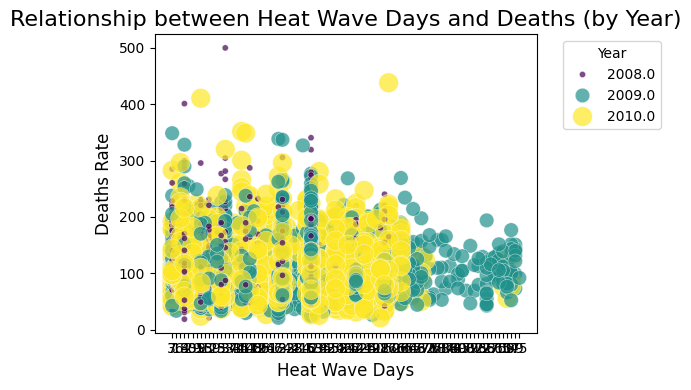

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制散点图，查看 'heat_wave_days' 和 'Deaths' 的关系
plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(
    data=merged_df, 
    x='heat_wave_days', 
    y='Rate', 
    hue='Year',  # 将年份添加为颜色变量
    palette='viridis', 
    size='Year',  # 可选，将年份映射为点的大小
    sizes=(20, 200),  # 调整点的大小范围
    alpha=0.7  # 设置透明度
)

# 添加标题和轴标签
plt.title("Relationship between Heat Wave Days and Deaths (by Year)", fontsize=16)
plt.xlabel("Heat Wave Days", fontsize=12)
plt.ylabel("Deaths Rate", fontsize=12)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')  # 调整图例位置
plt.tight_layout()

# 显示图表
plt.show()


In [62]:
merged_df.to_csv('heat_death_demo.csv', index=False)

In [56]:
print(merged_df.dtypes)

County             object
County Code       float64
avg_land_cover    float64
Year              float64
heat_wave_days     object
Deaths            float64
Population        float64
Crude Rate         object
Rate              float64
dtype: object


In [58]:
merged_df['heat_wave_days'] = pd.to_numeric(merged_df['heat_wave_days'], errors='coerce')  # Non-numeric values become NaN

In [60]:
import statsmodels.api as sm

# 假设df包含你的数据，且已经准备好了
X = merged_df[['heat_wave_days', 'avg_land_cover']]  # 自变量
X = sm.add_constant(X)  # 增加常数项
y = merged_df['Rate']  # 因变量

# 进行OLS回归
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     47.99
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.95e-21
Time:                        12:06:11   Log-Likelihood:                -39056.
No. Observations:                7578   AIC:                         7.812e+04
Df Residuals:                    7575   BIC:                         7.814e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             89.0323      2.481     35.

In [9]:
# 准备2009年的数据
import pandas as pd

df_heat_2009 = pd.read_csv('./Number of Heat Wave Days in May-September (2009).txt', sep='\t', quotechar='"', dtype={'County Code': str}, on_bad_lines='skip')
df_heat_2009.to_csv('heat_wave_days_2009.csv', index=False)
print(df_heat_2009.head())

df_death_2009 = pd.read_csv('./Underlying Cause of Death, 2009.txt', sep='\t', quotechar='"', dtype={'County Code': str}, on_bad_lines='skip')
df_death_2009.to_csv('respiratory_death_2009.csv', index=False)
print(df_death_2009.head())

  Notes              County County Code  \
0   NaN  Autauga County, AL       01001   
1   NaN  Baldwin County, AL       01003   
2   NaN  Barbour County, AL       01005   
3   NaN     Bibb County, AL       01007   
4   NaN   Blount County, AL       01009   

  Heat Wave Days Based on Daily Maximum Temperature  
0                                                36  
1                                                30  
2                                                31  
3                                                55  
4                                                39  
  Notes              County County Code    Year  Year Code  Deaths  \
0   NaN  Autauga County, AL       01001  2009.0     2009.0    44.0   
1   NaN  Baldwin County, AL       01003  2009.0     2009.0   160.0   
2   NaN  Barbour County, AL       01005  2009.0     2009.0    14.0   
3   NaN     Bibb County, AL       01007  2009.0     2009.0    23.0   
4   NaN   Blount County, AL       01009  2009.0     2009.0    69.0 

In [29]:
# 仅合并2009年的数据
file_1 = './county_avg_ndvi.csv'
file_2 = './respiratory_death_2009.csv'
file_3 = './heat_wave_days_2009.csv'

df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)
df3 = pd.read_csv(file_3)

print(df1.head())
print(df2.head())
print(df3.head())

   GEOID       NAME  avg_ndvi
0  19107     Keokuk  0.043300
1  19189  Winnebago  0.138771
2  20093     Kearny  0.082570
3  20123   Mitchell -0.019316
4  20187    Stanton  0.053343
  Notes              County  County Code    Year  Year Code  Deaths  \
0   NaN  Autauga County, AL       1001.0  2009.0     2009.0    44.0   
1   NaN  Baldwin County, AL       1003.0  2009.0     2009.0   160.0   
2   NaN  Barbour County, AL       1005.0  2009.0     2009.0    14.0   
3   NaN     Bibb County, AL       1007.0  2009.0     2009.0    23.0   
4   NaN   Blount County, AL       1009.0  2009.0     2009.0    69.0   

   Population  Crude Rate  
0     54135.0        81.3  
1    179406.0        89.2  
2     27657.0  Unreliable  
3     22941.0       100.3  
4     57341.0       120.3  
  Notes              County  County Code  \
0   NaN  Autauga County, AL       1001.0   
1   NaN  Baldwin County, AL       1003.0   
2   NaN  Barbour County, AL       1005.0   
3   NaN     Bibb County, AL       1007.0   
4   N

In [37]:
# 统一列名
df1.rename(columns={'GEOID': 'county_code'}, inplace=True)
df2.rename(columns={'County Code': 'county_code'}, inplace=True)
df3.rename(columns={'County Code': 'county_code'}, inplace=True)

# 合并三个 DataFrame
merged_df = df1.merge(df2, on=['county_code'], how='outer').merge(df3, on=['county_code'], how='outer')

# 查看合并结果
merged_df.head()

,county_code,NAME,avg_ndvi,Notes_x,County_x,Year,Year Code,Deaths,Population,Crude Rate,Notes_y,County_y,Heat Wave Days Based on Daily Maximum Temperature
0,1001.0,Autauga,0.491605,NaN,"Autauga County, AL",2009.0,2009.0,44.0,54135.0,81.3,NaN,"Autauga County, AL",36
1,1003.0,Baldwin,0.426574,NaN,"Baldwin County, AL",2009.0,2009.0,160.0,179406.0,89.2,NaN,"Baldwin County, AL",30
2,1005.0,Barbour,0.558331,NaN,"Barbour County, AL",2009.0,2009.0,14.0,27657.0,Unreliable,NaN,"Barbour County, AL",31
3,1007.0,Bibb,0.570957,NaN,"Bibb County, AL",2009.0,2009.0,23.0,22941.0,100.3,NaN,"Bibb County, AL",55
4,1009.0,Blount,0.739535,NaN,"Blount County, AL",2009.0,2009.0,69.0,57341.0,120.3,NaN,"Blount County, AL",39


In [39]:
merged_df.to_csv('heat_death_iv=ndvi_2009.csv', index=False)

In [47]:
merged_df.shape

(2525, 14)

In [65]:
# 剔除'Deaths'超过3000的异常数据
merged_df = merged_df[merged_df['Deaths'] <= 3000]

# 使用'Population'标准化死亡率'Rate'
merged_df['Rate'] = merged_df.apply(
    lambda row: 0 if row['Deaths'] == 0 else (row['Deaths'] / row['Population']) * 100000, axis=1
)

merged_df.describe()

,county_code,avg_ndvi,Year,Year Code,Deaths,Population,heat_wave_days,Rate
count,2525.000000,2519.000000,2525.0,2525.0,2525.000000,2.525000e+03,2516.000000,2525.000000
mean,30091.975842,0.356673,2009.0,2009.0,89.754059,1.140468e+05,15.558824,107.671840
std,15201.901333,0.267526,0.0,0.0,166.789266,2.657114e+05,19.741715,41.025938
min,1001.000000,-0.027128,2009.0,2009.0,10.000000,3.249000e+03,0.000000,21.076134
25%,18125.000000,0.083628,2009.0,2009.0,20.000000,1.821200e+04,0.000000,79.389832
50%,29031.000000,0.364150,2009.0,2009.0,37.000000,3.618100e+04,5.000000,101.854603
75%,44001.000000,0.582553,2009.0,2009.0,82.000000,8.904400e+04,28.000000,129.041508
max,56043.000000,0.886432,2009.0,2009.0,2444.000000,4.034866e+06,90.000000,348.618933


In [51]:
merged_df = merged_df.rename(columns={'Heat Wave Days Based on Daily Maximum Temperature': 'heat_wave_days'})
merged_df = merged_df.rename(columns={'NAME': 'County'})
merged_df.columns

Index(['county_code', 'County', 'avg_ndvi', 'Notes_x', 'County_x', 'Year',
       'Year Code', 'Deaths', 'Population', 'Crude Rate', 'Notes_y',
       'County_y', 'heat_wave_days', 'Rate'],
      dtype='object')

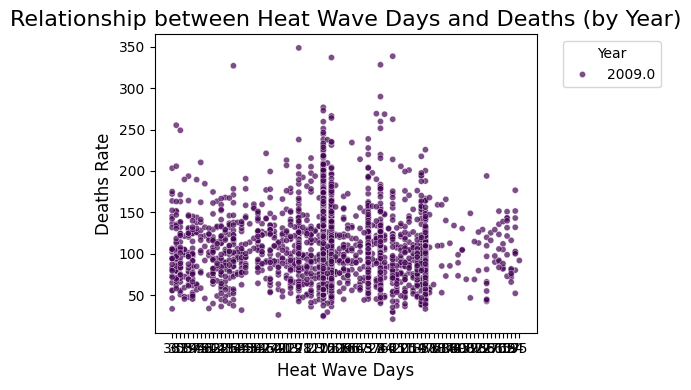

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制散点图，查看 'heat_wave_days' 和 'Deaths' 的关系
plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(
    data=merged_df, 
    x='heat_wave_days', 
    y='Rate', 
    hue='Year',  # 将年份添加为颜色变量
    palette='viridis', 
    size='Year',  # 可选，将年份映射为点的大小
    sizes=(20, 200),  # 调整点的大小范围
    alpha=0.7  # 设置透明度
)

# 添加标题和轴标签
plt.title("Relationship between Heat Wave Days and Deaths (by Year)", fontsize=16)
plt.xlabel("Heat Wave Days", fontsize=12)
plt.ylabel("Deaths Rate", fontsize=12)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')  # 调整图例位置
plt.tight_layout()

# 显示图表
plt.show()

In [69]:
merged_df['heat_wave_days'] = pd.to_numeric(merged_df['heat_wave_days'], errors='coerce')  # Non-numeric values become NaN

TypeError: arg must be a list, tuple, 1-d array, or Series

In [73]:
merged_df = merged_df[['heat_wave_days', 'avg_ndvi', 'county_code', 'heat_wave_days', 'Deaths']]
merged_df.shape

(2525, 11)

In [77]:
import statsmodels.api as sm

# 假设df包含你的数据，且已经准备好了
X = merged_df[['heat_wave_days', 'avg_ndvi']]  # 自变量
X = sm.add_constant(X)  # 增加常数项
y = merged_df['Rate']  # 因变量

# 进行OLS回归
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

KeyError: 'Rate'

In [75]:
# 检查自变量 X 和因变量 y 是否包含 NaN 或 inf
print(X.isnull().sum())  # 检查 X 中的缺失值
print(X.isin([float('inf'), -float('inf')]).sum())  # 检查 X 中的无穷大值

print(y.isnull().sum())  # 检查 y 中的缺失值
print(y.isin([float('inf'), -float('inf')]).sum())  # 检查 y 中的无穷大值


import statsmodels.api as sm

# 假设df包含你的数据，且已经准备好了
X = merged_df[['heat_wave_days', 'avg_ndvi']]  # 自变量
X = sm.add_constant(X)  # 增加常数项
y = merged_df['Rate']  # 因变量

# 进行OLS回归
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

const             0
heat_wave_days    9
avg_ndvi          6
dtype: int64
const             0
heat_wave_days    0
avg_ndvi          0
dtype: int64
0
0


KeyError: 'Rate'